<a href="https://colab.research.google.com/github/ReginaRamirezz/slsim/blob/main/EntrenamientoSlsimCOPIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Regresión supervizada
*   Arquitectura ResNet34
*   Aprendizaje por tranferencia






# Cargar datos como csv y muestra



In [ ]:
from google.colab import files
uploadedcsv = files.upload()  # selecciona valores.csv primero

import pandas as pd

df = pd.read_csv('configuraciones_simulaciones.csv')
df.head()
print(df.head)

z_deflector = df['z_deflector'].head(50)
print(z_deflector)


Saving configuraciones_simulaciones.csv to configuraciones_simulaciones.csv
<bound method NDFrame.head of           imagen   theta_E      mag_i   e1_mass   e2_mass  z_deflector  \
0    lente01.png  3.749080  23.401429  0.092798  0.039463     0.287222   
1    lente02.png  3.777794  21.991906  0.071593  0.044356     0.193495   
2    lente03.png  3.825254  23.203590 -0.129014  0.125646     1.213989   
3    lente04.png  3.612876  21.530637  0.087800 -0.130779     0.568063   
4    lente05.png  3.037062  21.819996 -0.054170  0.090653     0.857646   
..           ...       ...        ...       ...       ...          ...   
95   lente96.png  3.086838  21.899559 -0.152233 -0.059123     1.003494   
96   lente97.png  3.618391  21.893379 -0.138891  0.107434     1.112177   
97   lente98.png  4.920767  22.746645  0.021141 -0.156546     0.408561   
98   lente99.png  3.007766  22.555031 -0.007628  0.128209     0.457822   
99  lente100.png  4.848425  23.473742 -0.152126 -0.077765     1.207082   

    g

In [ ]:
import zipfile

#archivo .zip que contiene las 100 imágenes
uploaded = files.upload()
with zipfile.ZipFile("muestra.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")
    contenido = zip_ref.namelist()  # Obtiene la lista de archivos dentro del zip
    for nombre in contenido:
        print(nombre)


Saving muestra.zip to muestra.zip
muestra/
muestra/lente01.png
muestra/lente02.png
muestra/lente03.png
muestra/lente04.png
muestra/lente05.png
muestra/lente06.png
muestra/lente07.png
muestra/lente08.png
muestra/lente09.png
muestra/lente10.png
muestra/lente11.png
muestra/lente12.png
muestra/lente13.png
muestra/lente14.png
muestra/lente15.png
muestra/lente16.png
muestra/lente17.png
muestra/lente18.png
muestra/lente19.png
muestra/lente20.png
muestra/lente21.png
muestra/lente22.png
muestra/lente23.png
muestra/lente24.png
muestra/lente25.png
muestra/lente26.png
muestra/lente27.png
muestra/lente28.png
muestra/lente29.png
muestra/lente30.png
muestra/lente31.png
muestra/lente32.png
muestra/lente33.png
muestra/lente34.png
muestra/lente35.png
muestra/lente36.png
muestra/lente37.png
muestra/lente38.png
muestra/lente39.png
muestra/lente40.png
muestra/lente41.png
muestra/lente42.png
muestra/lente43.png
muestra/lente44.png
muestra/lente45.png
muestra/lente46.png
muestra/lente47.png
muestra/lente48.p

# Redimensionar las imagenes

Redimensionar imagenes a 224x224, para que puedan usarse con ResNet,
[texto del vínculo](https://arxiv.org/pdf/1906.06423)


In [ ]:
import os
from PIL import Image
import pandas as pd

# Cargar el CSV
df = pd.read_csv('configuraciones_simulaciones.csv')

# Nueva carpeta para las imágenes procesadas
processed_dir = "/content/muestra_cropped"
os.makedirs(processed_dir, exist_ok=True)

# Recortar/redimensionar imágenes
for img_name in df['imagen']:
    img_path = os.path.join("/content/muestra", img_name)
    if os.path.exists(img_path):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224, 224))
        img.save(os.path.join(processed_dir, img_name))
    else:
        print(f"Imagen no encontrada: {img_name}")

# Actualizamos la ruta en la columna 'imagen', NO se si esta guardando bien
df['imagen'] = df['imagen'].apply(lambda x: os.path.join(processed_dir, x))
df.to_csv('dataset_lentes.csv', index=False)


Visualizar la imagen

In [ ]:
from PIL import Image

img = Image.open('/content/muestra_cropped/lente02.png')
print("Tamaño de la imagen:", img.size)  # Debería mostrar (224, 224)


Tamaño de la imagen: (224, 224)


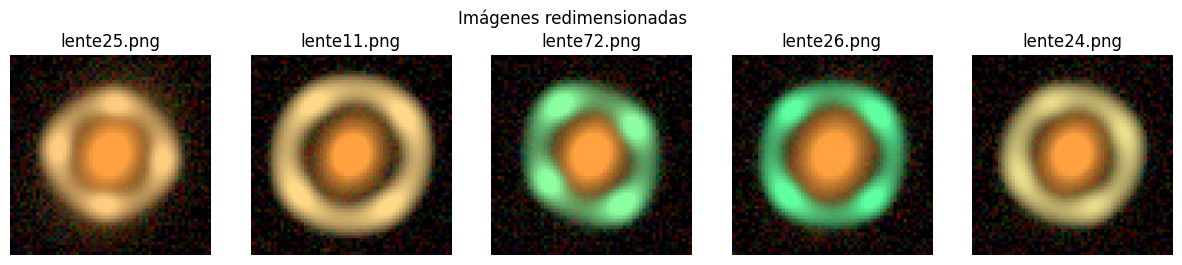

In [ ]:
import random
import matplotlib.pyplot as plt

carpeta = '/content/muestra_cropped'
imagenes = [img for img in os.listdir(carpeta) if img.endswith('.png')]
seleccion = random.sample(imagenes, 5) #muestra 5 imagenes aleatorias

plt.figure(figsize=(15, 3))
for i, nombre in enumerate(seleccion):
    img = Image.open(os.path.join(carpeta, nombre))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(nombre)
    plt.axis('off')
plt.suptitle("Imágenes redimensionadas")
plt.show()

# Dividir el dataset
(75% entrenamiento / 25% validación)
Ya cosas raras

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset_lentes.csv')

train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)

#PORQUE DIVIDO EL ARCHIVO CSV?
# Guardamos para usarlos en el dataset
train_df.to_csv('train_lentes.csv', index=False)
val_df.to_csv('val_lentes.csv', index=False)

# Imprimir los primeros registros
print("Datos de entrenamiento:")
print(train_df.head())  # Puedes cambiar head() por tail() para ver los últimos

print("\nDatos de validación:")
print(val_df.head())

Datos de entrenamiento:
                                  imagen   theta_E      mag_i   e1_mass  \
15  /content/muestra_cropped/lente16.png  3.339131  22.534498  0.041211   
40  /content/muestra_cropped/lente41.png  4.513952  22.934123 -0.040287   
96  /content/muestra_cropped/lente97.png  3.618391  21.893379 -0.138891   
9   /content/muestra_cropped/lente10.png  4.801253  23.176153  0.097175   
72  /content/muestra_cropped/lente73.png  4.414013  23.054815  0.090337   

     e2_mass  z_deflector  gamma_pl  n_sersic  angular_size  
15  0.189201     0.395520  2.109368  2.968447      0.491149  
40  0.030044     0.893160  1.333835  2.884081      0.286677  
96  0.107434     1.112177  1.482461  2.906700      0.485012  
9  -0.043549     0.625464  1.337173  2.315328      0.121550  
72 -0.193428     1.093718  2.368541  2.552448      0.584109  

Datos de validación:
                                  imagen   theta_E      mag_i   e1_mass  \
83  /content/muestra_cropped/lente84.png  4.189053  21.6

Definir el dataset personalizado para PyTorch

In [ ]:
from torch.utils.data import Dataset
from torchvision import transforms
import torch
from PIL import Image

class LentesDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):   #genera un path?
        img_path = self.data.iloc[idx]['imagen']
        image = Image.open(img_path).convert('RGB') #toma valores de Image?
        if self.transform:
            image = self.transform(image)
        # Valores objetivo
        label = self.data.iloc[idx][['theta_E', 'e1_mass', 'e2_mass']].values.astype('float32')
        return image, torch.tensor(label)


In [ ]:
iterable = LentesDataset('train_lentes.csv')

print(iterable[0])

(<PIL.Image.Image image mode=RGB size=224x224 at 0x7DEC5F518A50>, tensor([3.3391, 0.0412, 0.1892]))


# Preparar los transform y dataloaders

In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as T

transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalización básica
])

train_dataset = LentesDataset('train_lentes.csv', transform=transform)
val_dataset = LentesDataset('val_lentes.csv', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Obtener un batch del loader
train_iter = iter(train_loader)
images, labels = next(train_iter)

# Imprimir formas y valores
print("Batch de entrenamiento:")
print("Shape de las imágenes:", images.shape)
print("Shape de las etiquetas:", labels.shape)
print("Etiquetas:", labels)


Batch de entrenamiento:
Shape de las imágenes: torch.Size([8, 3, 224, 224])
Shape de las etiquetas: torch.Size([8, 3])
Etiquetas: tensor([[ 4.2257,  0.0122, -0.0674],
        [ 4.6079, -0.1186, -0.1073],
        [ 4.4399, -0.1741, -0.1683],
        [ 4.4140,  0.0903, -0.1934],
        [ 4.2791, -0.1931, -0.1953],
        [ 4.0108,  0.0979, -0.0724],
        [ 4.5140, -0.0403,  0.0300],
        [ 4.0933, -0.1342, -0.1077]])


Cargar y adaptar modelo ResNet-34
¿apenas se esta cargando el modelo preentrenado?

In [ ]:
import torch.nn as nn
import torchvision.models as models

# Cargar modelo preentrenado
model = models.resnet34(weights='DEFAULT')  # O usar convnext_tiny si quieres

# Adaptar para regresión, ¿se tiene que adaptar?, por el tamaño del batch?
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # 3 salidas: theta_E, e1_mass, e2_mass


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 114MB/s]


# Configuración de entrenamiento

In [ ]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 3.5259
Epoch 2, Loss: 0.9628
Epoch 3, Loss: 0.1674
Epoch 4, Loss: 0.0523
Epoch 5, Loss: 0.0455
Epoch 6, Loss: 0.0359
Epoch 7, Loss: 0.0367
Epoch 8, Loss: 0.0365
Epoch 9, Loss: 0.0216
Epoch 10, Loss: 0.0289


# Evaluacion del modelo

In [ ]:
model.eval()
with torch.no_grad():
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device) #que es targerts?
        preds = model(images)
        print("Predicciones:", preds[0].cpu().numpy())
        print("Valores reales:", targets[0].cpu().numpy())
        break


Predicciones: [ 3.626015   -0.0055815  -0.01357844]
Valores reales: [ 4.189053   -0.04566389 -0.02390776]


# Herramientas de validación

## Curvas de aprendizaje

Epoch 1, Train Loss: 0.0111, Val Loss: 0.0334
Epoch 2, Train Loss: 0.0243, Val Loss: 0.0447
Epoch 3, Train Loss: 0.0208, Val Loss: 0.0315
Epoch 4, Train Loss: 0.0150, Val Loss: 0.0373
Epoch 5, Train Loss: 0.0129, Val Loss: 0.0341
Epoch 6, Train Loss: 0.0125, Val Loss: 0.0325
Epoch 7, Train Loss: 0.0279, Val Loss: 0.0336
Epoch 8, Train Loss: 0.0103, Val Loss: 0.0377
Epoch 9, Train Loss: 0.0156, Val Loss: 0.0406
Epoch 10, Train Loss: 0.0147, Val Loss: 0.0300


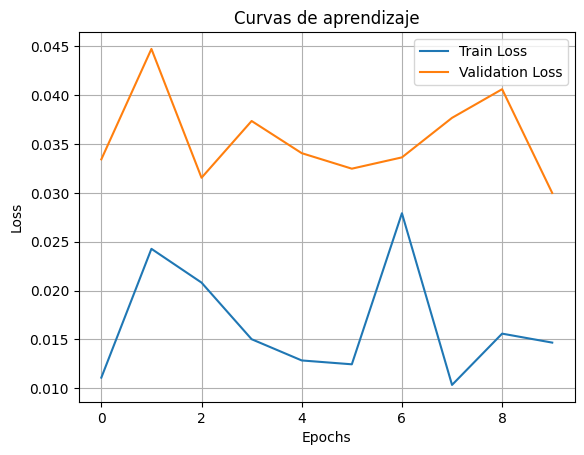

In [ ]:
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    # Validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, targets in val_loader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Curvas de aprendizaje')
plt.legend()
plt.grid()
plt.show()



## Evaluación del modelo con métricas de regresión

In [ ]:
!pip install -U scikit-learn


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² Score:", r2_score(y_true, y_pred))



MSE: 0.031445618718862534
RMSE: 0.17732912541052734
MAE: 0.11848167330026627
R² Score: 0.20208506286144257


## Gráfica de dispersión: Real vs Predicho

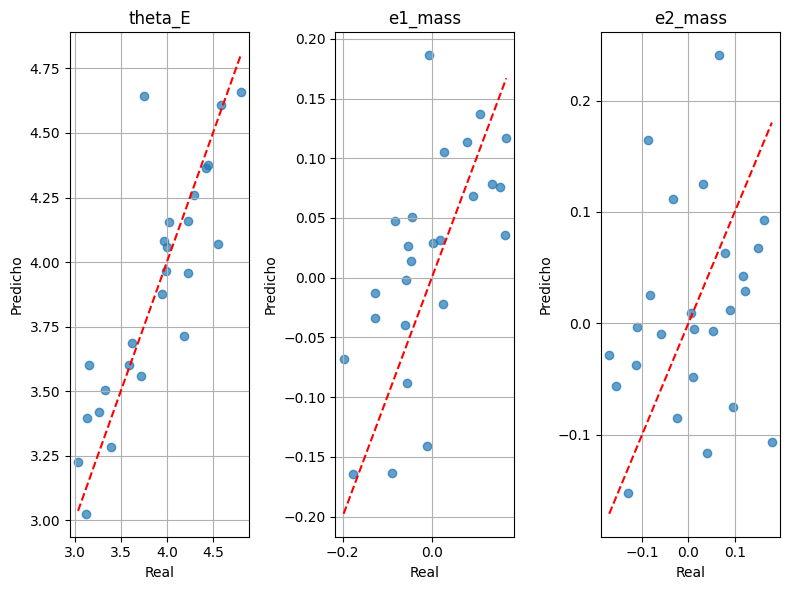

In [ ]:
plt.figure(figsize=(8, 6))
for i, label in enumerate(['theta_E', 'e1_mass', 'e2_mass']):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_true[:, i], y_pred[:, i], alpha=0.7)
    plt.plot([y_true[:, i].min(), y_true[:, i].max()],
             [y_true[:, i].min(), y_true[:, i].max()], 'r--')
    plt.xlabel('Real')
    plt.ylabel('Predicho')
    plt.title(label)
    plt.grid()

plt.tight_layout()
plt.show()
